In [1]:
# Notebook: Methylation plots
# Description: Visualise methylation level for AIM2 PARP9 and DTX3L.

In [2]:
%load_ext lab_black

In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests

import scipy.stats as sts
import plotly.graph_objects as go

In [5]:
# Load mynorm
mynorm = pd.read_csv("../data/processed/CorrectedMyNorms/mynorm_ALL.csv", index_col=0)

# Convert names
sample_name = dict(
    pd.read_csv("../data/raw/CONCATED_USA_HB/SampleSheet.csv", index_col=0)["ID"]
)

mynorm.columns = [
    sample_name.get(name)
    if name in sample_name.keys() and not "Control" in name
    else name
    for name in mynorm.columns
]

In [37]:
# Probes to visualise

probes_to_check = {
    "PARP9|DTX3L cg22930808": "cg22930808",
    "PARP9|DTX3L cg08122652": "cg08122652",
    "PARP9|DTX3L cg00959259": "cg00959259",
    "PARP9|DTX3L cg07815522": "cg07815522",
    "AIM2 cg17515347": "cg17515347",
    "AIM2 cg24145401": "cg24145401",
}

In [38]:
cov_vs_hb = set(
    ("cg17515347", "cg22930808")
)  # DMPs identfied in COVID-19 groups vs healthy controls
cov_vs_noncov = set(
    ("cg17515347", "cg08122652", "cg00959259", "cg07815522", "cg24145401")
)  # DMPs identified in COVID-19 vsn non-COVID-19

In [39]:
mynorm

,GSM5163416,GSM5163665,HB_Control_55,GSM5163545,GSM5163399,GSM5163452,GSM5163523,GSM5163719,GSM5163724,GSM5163501,...,HB_Control_56,HB_Control_5,GSM5163645,GSM5163539,GSM5163468,GSM5163752,GSM5163688,GSM5163557,GSM5163700,GSM5163558
cg07881041,0.935211,0.916472,0.950026,0.938661,0.935492,0.936313,0.931803,0.949131,0.925647,0.926230,...,0.958217,0.971901,0.936794,0.940446,0.918540,0.943434,0.943309,0.929882,0.918395,0.942468
cg03513874,0.949708,0.952116,0.960858,0.960932,0.950177,0.964056,0.958375,0.967085,0.954135,0.951331,...,0.961740,0.979503,0.960365,0.966633,0.964546,0.956571,0.958966,0.956064,0.937248,0.960634
cg05451842,0.018322,0.038424,0.018862,0.029493,0.028579,0.027257,0.022905,0.035986,0.047026,0.034438,...,0.021915,0.028428,0.019467,0.027919,0.032816,0.022596,0.047823,0.037890,0.050431,0.034599
cg14797042,0.982648,0.980196,0.976050,0.988053,0.972043,0.984534,0.988774,0.978081,0.979501,0.980087,...,0.989071,0.991040,0.981787,0.952791,0.981366,0.984272,0.970302,0.978987,0.976883,0.966952
cg09838562,0.023859,0.025060,0.027717,0.023748,0.017436,0.013711,0.017941,0.024951,0.019588,0.023118,...,0.037122,0.022375,0.024535,0.017490,0.007125,0.014753,0.038547,0.013747,0.027131,0.018791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg19812938,0.888326,0.861933,0.907716,0.896324,0.889551,0.864436,0.907918,0.880979,0.874086,0.903921,...,0.902692,0.917908,0.878571,0.894242,0.887043,0.891423,0.881355,0.905385,0.881755,0.893017
cg06272054,0.007490,0.020013,0.014040,0.010439,0.013124,0.008665,0.013010,0.020085,0.027087,0.017981,...,0.013429,0.007749,0.012920,0.011933,0.012445,0.012191,0.014149,0.015487,0.024309,0.012225
cg07255356,0.017639,0.026366,0.020712,0.015384,0.028536,0.022007,0.014413,0.022801,0.028874,0.024762,...,0.021964,0.019534,0.024438,0.023472,0.009817,0.025131,0.024008,0.020506,0.046217,0.016435
cg24220897,0.945445,0.907163,0.962559,0.947993,0.887286,0.931389,0.938714,0.926924,0.931856,0.939725,...,0.957073,0.959965,0.888744,0.920682,0.928197,0.928846,0.935937,0.866352,0.916659,0.944411


In [40]:
# mynorm with non-covid-19 samples
non_covid_control_mynorm = mynorm[
    [name for name in mynorm.columns if name.startswith("NC")]
]
print(non_covid_control_mynorm.shape)

# mynorm with covid-19 USA samples
usa_mynorm = mynorm[
    [
        name
        for name in mynorm.columns
        if name.startswith("C") and not name.startswith("Control")
    ]
]
print(usa_mynorm.shape)

# mynorm with covid-19 PL samples
pl_mynorm = mynorm[[name for name in mynorm.columns if name.startswith("P")]]
print(pl_mynorm.shape)


# mynorm with covid-19 SPAIN samples
spain_mynorm = mynorm[[name for name in mynorm.columns if name.startswith("GSM")]]
print(spain_mynorm.shape)

# mynorm with healthy control samples
control_mynorm = mynorm[[name for name in mynorm.columns if "Control" in name]]
print(control_mynorm.shape)

(709071, 26)
(709071, 102)
(709071, 32)
(709071, 407)
(709071, 83)


In [41]:
# Function to update plot figure


def __asterix(pval: float, groups_number: int = 3) -> str:
    """
    Return graphical representation of statistical significance.
    """
    if pval > 0.05:
        asterix = "ns"

    elif pval <= 0.05 and pval > 0.01:
        asterix = "*"

    elif pval <= 0.01 and pval > 0.001:
        asterix = "**"

    else:
        asterix = "***"

    return asterix


def __delta(delta: float) -> str:
    """
    Return delta methylation level.
    """
    if delta < 0.05:
        return "< 0.05"
    else:
        return f"= {delta}"


def add_p_val(fig, pval: float, delta: float, loc_x: tuple, loc_y: float):
    """
    Return updated figure with annotations.
    """
    asterix = __asterix(pval)
    delta = __delta(delta)

    fig.add_shape(
        type="line",
        x0=loc_x[0],
        y0=loc_y,
        x1=loc_x[1],
        y1=loc_y,
        line=dict(color="RoyalBlue", width=3),
    )

    fig.add_shape(
        type="line",
        x0=loc_x[0],
        y0=loc_y,
        x1=loc_x[0],
        y1=loc_y - 0.1,
        line=dict(color="RoyalBlue", width=3),
    )
    fig.add_shape(
        type="line",
        x0=loc_x[1],
        y0=loc_y,
        x1=loc_x[1],
        y1=loc_y - 0.1,
        line=dict(color="RoyalBlue", width=3),
    )

    fig.add_annotation(
        x=np.mean(loc_x),
        font={"size": 15},
        y=loc_y + 0.095,
        text=f"|delta| {delta} {asterix}",
        showarrow=False,
    )

    return fig


def test(set_a: list, set_b: list) -> tuple:
    """
    Return p_value.
    """
    _, norm_a = sts.shapiro(set_a)
    _, norm_b = sts.shapiro(set_b)
    _, bart = sts.bartlett(set_a, set_b)

    if norm_a > 0.05 and norm_b > 0.05 and bart > 0.05:
        _, pval = sts.f_oneway(set_a, set_b)

    else:
        _, pval = sts.kruskal(set_a, set_b)

    delta_abs = abs(np.mean(set_a) - np.mean(set_b))

    return pval, round(delta_abs, 3)

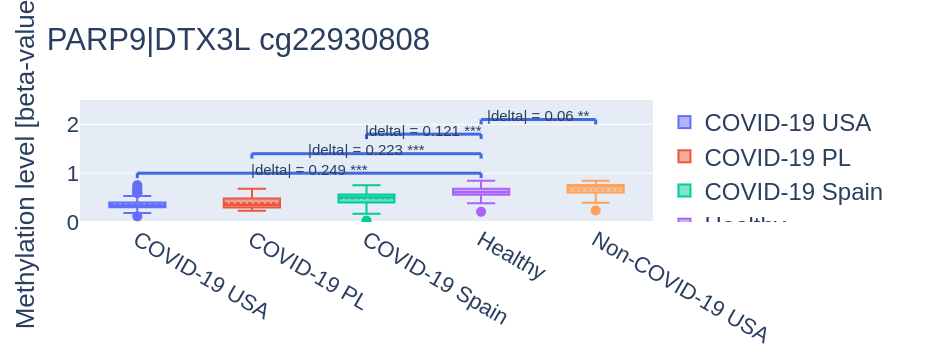

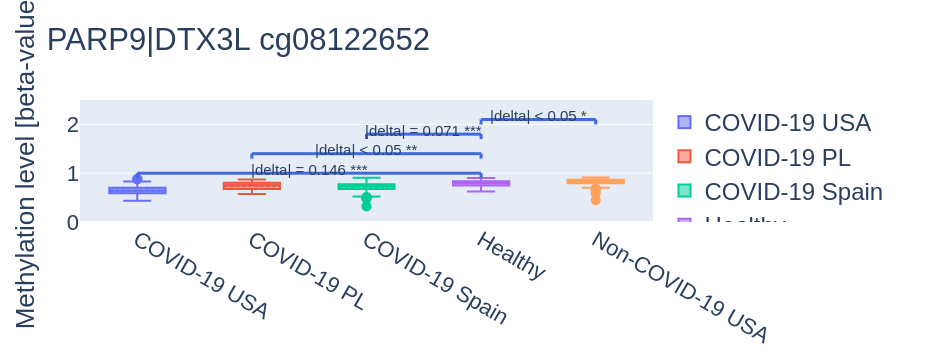

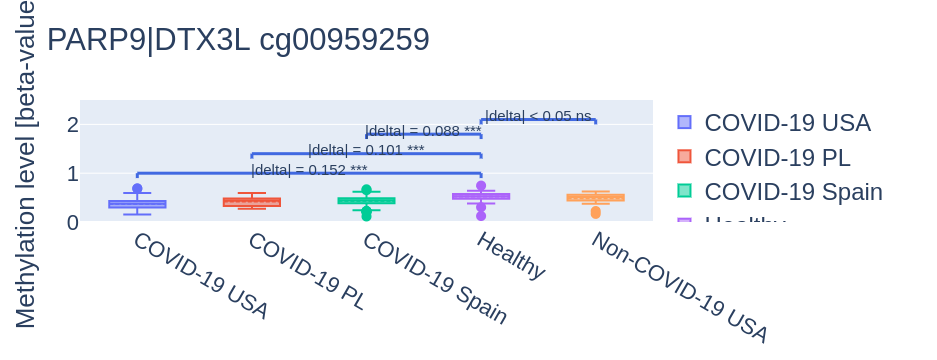

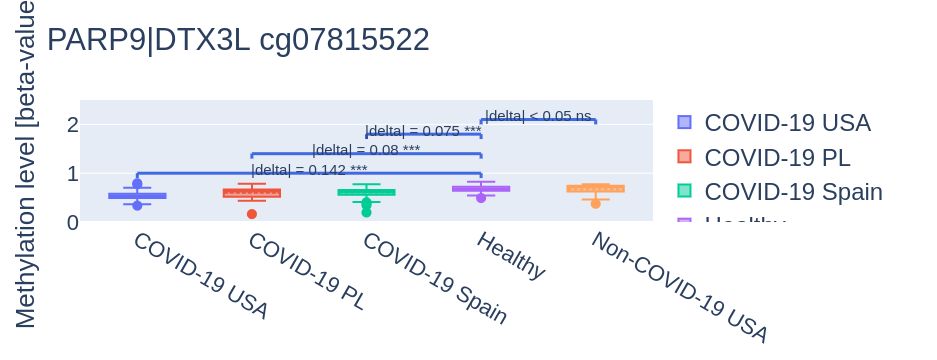

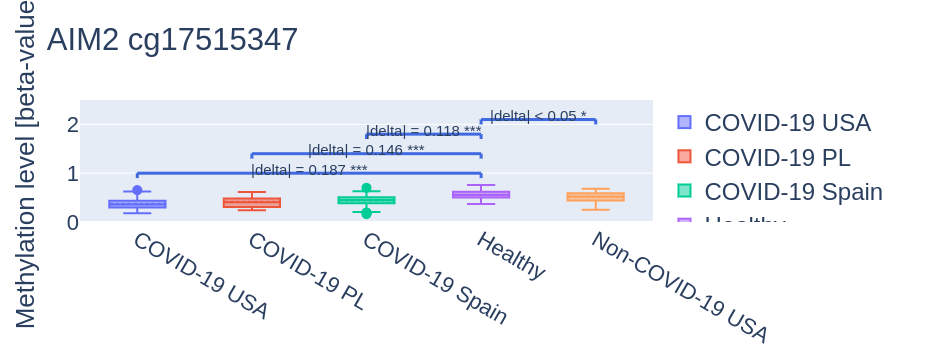

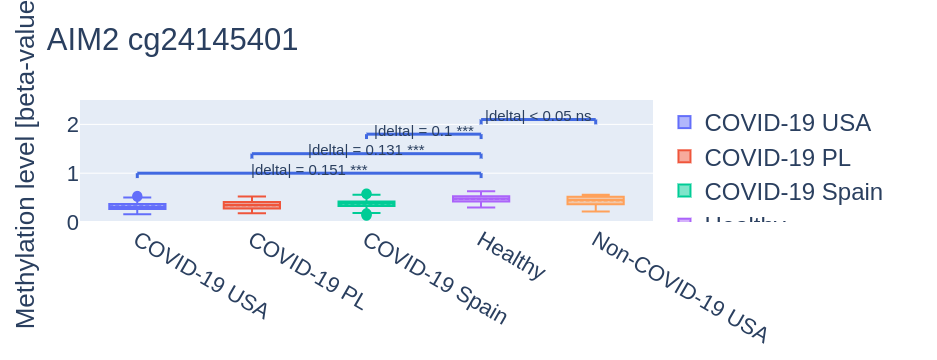

In [42]:
for gene, probe in probes_to_check.items():

    # Load beta-values for specific CpG in COVID PL / USA / SPAIN / non-COVID and healthy controls
    met_usa = usa_mynorm.loc[probe].values.flatten()
    met_pl = pl_mynorm.loc[probe].values.flatten()
    met_spain = spain_mynorm.loc[probe].values.flatten()
    met_control = control_mynorm.loc[probe].values.flatten()
    met_control_non_covid = non_covid_control_mynorm.loc[probe].values.flatten()

    # Create figure object
    fig = go.Figure()

    # Add trace for USA samples
    fig.add_trace(
        go.Box(
            x=["COVID-19 USA"] * len(met_usa),
            y=met_usa,
            name="COVID-19 USA",
            boxmean=True,
        )
    )

    # Add trace for PL samples
    fig.add_trace(
        go.Box(
            x=["COVID-19 PL"] * len(met_pl),
            y=met_pl,
            name="COVID-19 PL",
            boxmean=True,
        )
    )

    # Add trace for Spain samples
    fig.add_trace(
        go.Box(
            x=["COVID-19 Spain"] * len(met_spain),
            y=met_spain,
            name="COVID-19 Spain",
            boxmean=True,
        )
    )

    # Add trace for healthy
    fig.add_trace(
        go.Box(
            x=["Healthy"] * len(met_control),
            y=met_control,
            name="Healthy",
            boxmean=True,
        )
    )

    # Add trace for non-covid-19
    fig.add_trace(
        go.Box(
            x=["Non-COVID-19 USA"] * len(met_control_non_covid),
            y=met_control_non_covid,
            name="non-COVID-19 USA",
            boxmean=True,
        )
    )
    fig.update_layout(
        title=f"{gene}",
        yaxis_title=f"Methylation level [beta-value]",
        legend_title="Legend",
        yaxis=dict(range=[0, 2.5], autorange=False),
        legend=dict(font=dict(size=24), title=""),
        font=dict(size=22),
    )

    # Add pvalue
    usa_control, delta_usa_control = test(met_usa, met_control)
    pl_control, delta_pl_control = test(met_pl, met_control)
    spain_control, delta_spain_control = test(met_spain, met_control)

    control_vs_noncovid, delta_control_vs_noncovid = test(
        met_control, met_control_non_covid
    )

    pvals = [usa_control, pl_control, spain_control, control_vs_noncovid]
    _, adj_pvals, _, _ = multipletests(pvals, method="fdr_bh")

    usa_control, pl_control, spain_control, control_vs_noncovid = adj_pvals

    fig = add_p_val(fig, usa_control, delta_usa_control, loc_x=(0, 3), loc_y=1)
    fig = add_p_val(fig, pl_control, delta_pl_control, loc_x=(1, 3), loc_y=1.4)
    fig = add_p_val(fig, spain_control, delta_spain_control, loc_x=(2, 3), loc_y=1.8)
    fig = add_p_val(
        fig, control_vs_noncovid, delta_control_vs_noncovid, loc_x=(3, 4), loc_y=2.1
    )

    fig.update_traces(marker=dict(size=10))

    fig.write_image(f"../Plots/MethTracks/{gene}.jpg")
    fig.show()